# Лабораторна робота №1. Використання бібліотек Pandas та Matplotlib

**Підгрупа №1**

Виконав: **Кирил Лазаренко. КМ-22**

**Дані:** Дані знаходяться у файлі `Weather.csv`

## Завдання

1. Відкрити та зчитати файл з даними.
2. Визначити та вивести кількість записів та кількість полів у кожному записі.
3. Вивести 5 записів, починаючи з **М-ого** (число **М** – місяць народження студента, має бути визначено як змінна), та кожен **N-ий запис**, де число **N** визначається як:
   - **500 * М** для місяця з першого півріччя;
   - **300 * М** для місяця з другого півріччя.
4. Визначити та вивести тип полів кожного запису.
5. Замість поля `СЕТ` ввести нові текстові поля, що відповідають числу, місяцю та року. Місяць та число повинні бути записані у двоцифровому форматі.
6. Визначити та вивести:
   - **a.** Кількість днів із порожнім значенням поля `Events`;
   - **b.** День, у який середня вологість була мінімальною, а також швидкості вітру в цей день;
   - **c.** Місяці, коли середня температура від нуля до п’яти градусів.
7. Визначити та вивести:
   - **a.** Середню максимальну температуру по кожному дню за всі роки;
   - **b.** Кількість днів у кожному році з туманом.
8. Побудувати стовпчикову діаграму кількості `Events`.
9. Побудувати кругову діаграму напрямків вітру (сектор на діаграмі має відповідати одному з восьми напрямків – північний, південний, східний, західний та проміжні).
10. Побудувати на одному графіку (тип графіка обрати самостійно!):
    - **a.** Середню по кожному місяцю кожного року максимальну температуру;
    - **b.** Середню по кожному місяцю кожного року мінімальну точку роси.


---
## 1. Відкрити та зчитати файл з даними.
---

In [1]:
import pandas as pd
from pathlib import Path

file_path = Path('data') / 'Weather.csv'
weather_df = pd.read_csv(file_path)
weather_df.columns = weather_df.columns.str.lstrip() # .lstrip() видаляє пробіли на початку
weather_df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-1-1,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-1-2,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-1-3,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-1-4,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-1-5,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


---
## 2. Визначити та вивести кількість записів та кількість полів у кожному записі.

---
##### DataFrame Dimensions with `.shape`

Метод **`df.shape`** повертає кортеж, що містить розміри DataFrame:

- **Перший елемент**: Кількість рядків (записів)
- **Другий елемент**: Кількість стовпців (полів)
---

In [2]:
num_records = weather_df.shape[0] # к-сть записів (рядків)
num_columns = weather_df.shape[1] # к-сть полів (стовців)

print(f'кількість записів: {num_records}')
print(f'кількість полів  : {num_columns}')

кількість записів: 6812
кількість полів  : 23


---
## 3. Вивести 5 записів
Вивести 5 записів, починаючи з **М-ого** (число **М** – місяць народження студента, має бути визначено як змінна), та кожен **N-ий запис**, де число **N** визначається як:
   - **500 * М** для місяця з першого півріччя;
   - **300 * М** для місяця з другого півріччя.

---
##### Позиційне зрізання з `df.iloc[start:stop:step]`

Синтаксис **`df.iloc[start:stop:step]`** дозволяє вибирати рядки з DataFrame за їх позиційними індексами

- **`start`**: Початковий індекс рядка (включно). Якщо не вказати, зріз починається з першого рядка.
- **`stop`**: Кінцевий індекс рядка (не включно). Якщо не вказати, зріз триває до кінця DataFrame.
- **`step`**: Крок зрізу, тобто інтервал між вибраними рядками. За замовчуванням дорівнює 1.

---

In [3]:
# виведення перших 5 записів, починаючи з M
M = 11
weather_df.iloc[M:].head(5)

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
11,1997-1-12,17.0,10.0,3.0,8.0,6.0,3.0,100.0,84.0,55.0,...,10.0,10.0,10.0,14,8,NaN,0.0,1.0,NaN,345
12,1997-1-13,15.0,9.0,4.0,9.0,4.0,-1.0,100.0,75.0,38.0,...,10.0,9.0,3.0,11,2,NaN,0.0,4.0,Fog,128
13,1997-1-14,11.0,6.0,0.0,4.0,2.0,0.0,100.0,81.0,50.0,...,10.0,9.0,1.0,14,2,NaN,0.0,4.0,NaN,35
14,1997-1-15,11.0,8.0,5.0,7.0,5.0,4.0,100.0,83.0,62.0,...,10.0,10.0,8.0,10,3,NaN,0.0,6.0,Rain,16
15,1997-1-16,12.0,9.0,6.0,8.0,7.0,6.0,100.0,89.0,72.0,...,10.0,10.0,10.0,24,5,NaN,0.0,6.0,NaN,63


In [4]:
# виведення кожного N-го запису
count_month_in_year = 12
if M <= count_month_in_year / 2:
    N = 500 * M
else:
    N = 300 * M

weather_df.iloc[::N]

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-1-1,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
3300,2006-5-21,28.0,20.0,13.0,7.0,4.0,-3.0,67.0,38.0,17.0,...,10.0,10.0,10.0,32,10,52.0,0.0,6.0,NaN,227
6600,2015-6-3,34.0,26.0,17.0,10.0,8.0,4.0,59.0,31.0,10.0,...,31.0,24.0,10.0,24,10,34.0,0.0,1.0,NaN,127


---
## 4. Визначити та вивести тип полів кожного запису.

---

**`df.dtypes`** — атрибут DataFrame з Pandas, що повертає типи даних кожного стовпця у вигляді Series:

- **Індекси**: назви стовпців.
- **Значення**: типи даних (наприклад, `int64`, `float64`, `object`).

---

In [5]:
weather_df.dtypes

CET                            object
Max TemperatureC              float64
Mean TemperatureC             float64
Min TemperatureC              float64
Dew PointC                    float64
MeanDew PointC                float64
Min DewpointC                 float64
Max Humidity                  float64
Mean Humidity                 float64
Min Humidity                  float64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm              float64
Mean VisibilityKm             float64
Min VisibilitykM              float64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                  int64
dtype: object

---
## 5. Розбиття поля `СЕТ`
---
Замість поля `СЕТ` ввести нові текстові поля, що відповідають числу, місяцю та року. Місяць та число повинні бути записані у двоцифровому форматі.

In [6]:
weather_df[['year', 'month', 'day']] = weather_df['CET'].str.split('-', expand=True)

weather_df['CET'] = pd.to_datetime(weather_df['CET'])
weather_df['day_of_year'] = weather_df['CET'].dt.dayofyear
weather_df.drop(columns='CET', inplace=True)

weather_df['day'] = weather_df['day'].str.zfill(2)
weather_df['month'] = weather_df['month'].str.zfill(2)

new_order = ['year', 'month', 'day'] + [col for col in weather_df.columns if col not in ['year', 'month', 'day']]
weather_df = weather_df[new_order]
weather_df.head()

,year,month,day,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,...,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,day_of_year
0,1997,01,01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,...,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229,1
1,1997,01,02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,...,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143,2
2,1997,01,03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,...,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256,3
3,1997,01,04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,...,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284,4
4,1997,01,05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,...,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2,5


---
## 6. Визначити та вивести:
   - **a.** Кількість днів із порожнім значенням поля `Events`;
   - **b.** День, у який середня вологість була мінімальною, а також швидкості вітру в цей день;
   - **c.** Місяці, коли середня температура від нуля до п’яти градусів.
---

- **a.** Кількість днів із порожнім значенням поля `Events`;
---

In [7]:
count_empty_events = weather_df['Events'].isna().sum()

print(f'кількість днів із порожнім значенням поля Events: {count_empty_events}')

кількість днів із порожнім значенням поля Events: 5014


---
- **b.** День, у який середня вологість була мінімальною, а також швидкості вітру в цей день;
- ---

In [8]:
min_humidity_rows = weather_df[weather_df['Mean Humidity'] == weather_df['Mean Humidity'].min()]

if len(min_humidity_rows) == 1:
    min_humidity_row = weather_df.loc[weather_df['Mean Humidity'].idxmin()]
    print(f'день, у який середня вологість була мінімальною {min_humidity_row['Mean Humidity']}:', end=' ')
    print(f'{min_humidity_row['day']}.{min_humidity_row['month']}.{min_humidity_row['year']}')
    print(f'швидкість вітру в цей день: {min_humidity_row['Mean Wind SpeedKm/h']}')
else:
    print('в датафреймі кілька днів з однаковою мінімальною вологістю, перелік цих днів:')
    for _, row in min_humidity_rows.iterrows():
        print(f'День: {row["day"]}.{row["month"]}.{row["year"]}, '
              f'Середня вологість: {row["Mean Humidity"]}, '
              f'Швидкість вітру: {row["Mean Wind SpeedKm/h"]}')

день, у який середня вологість була мінімальною 15.0: 06.08.2005
швидкість вітру в цей день: 10


---
- **c.** Місяці, коли середня температура від нуля до п’яти градусів.
---

In [9]:
weather_df_month = weather_df.groupby(['year', 'month'])['Mean TemperatureC'].mean().reset_index()
weather_df_month_fil = weather_df_month[(weather_df_month['Mean TemperatureC'] >= 0) & (weather_df_month['Mean TemperatureC'] <= 5)]

for _, row in weather_df_month_fil.iterrows():
    print(f'місяць: {row['month']}.{row['year']}, середнє температура: {round(row['Mean TemperatureC'], 2)}')

місяць: 12.1998, середнє температура: 4.45
місяць: 01.2000, середнє температура: 3.71
місяць: 12.2001, середнє температура: 2.1
місяць: 01.2004, середнє температура: 4.0
місяць: 01.2005, середнє температура: 4.16
місяць: 02.2005, середнє температура: 4.29
місяць: 01.2006, середнє температура: 4.42
місяць: 12.2007, середнє температура: 4.84
місяць: 01.2009, середнє температура: 4.58
місяць: 02.2012, середнє температура: 4.52


---
## 7. Визначити та вивести:
   - **a.** Середню максимальну температуру по кожному дню за всі роки;
   - **b.** Кількість днів у кожному році з туманом.
---
- **a.** Середню максимальну температуру по кожному дню за всі роки;
---

In [10]:
avr_maxT_days = weather_df.groupby(['day_of_year']).agg(
    Avr_max_T=('Max TemperatureC', 'mean')
).reset_index()

pd.set_option('display.max_rows', None)

display(avr_maxT_days)

,day_of_year,Avr_max_T
0,1,9.894737
1,2,10.833333
2,3,10.500000
3,4,11.000000
4,5,10.388889
5,6,11.222222
6,7,9.166667
7,8,9.777778
8,9,9.388889
9,10,9.166667


---
- **b.** Кількість днів у кожному році з туманом.
---

In [11]:
print(weather_df['Events'].unique())

[nan 'Rain' 'Rain-Snow' 'Snow' 'Fog' 'Fog-Rain' 'Rain-Thunderstorm'
 'Thunderstorm' 'Rain-Hail-Thunderstorm' 'Fog-Thunderstorm' 'Tornado'
 'Fog-Rain-Thunderstorm' 'Fog-Rain-Snow' 'Fog-Snow'
 'Rain-Snow-Thunderstorm' 'Rain-Hail']


In [12]:
fog_df = weather_df[weather_df['Events'].str.contains('Fog', na=False)]
fog_df_by_years = fog_df.groupby(['year'])['Events'].count().reset_index()
fog_df_by_years

,year,Events
0,1997,27
1,1998,17
2,1999,17
3,2000,15
4,2001,13
5,2002,29
6,2003,14
7,2004,10
8,2005,8
9,2006,11


---
## 8. Побудувати стовпчикову діаграму кількості `Events`.
---

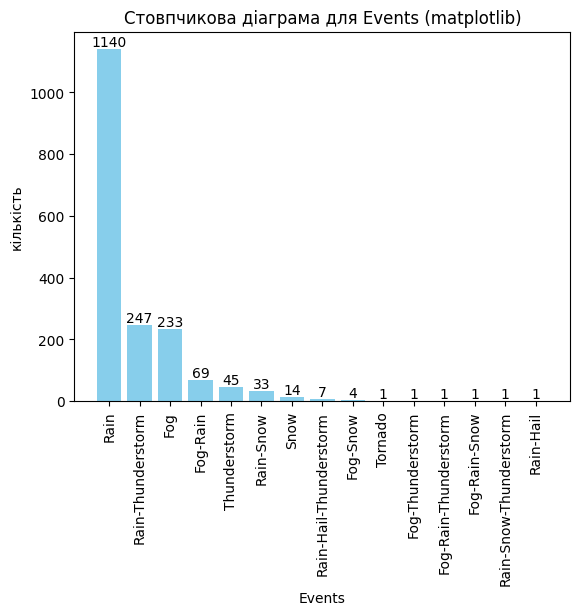

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = weather_df['Events'].value_counts()
bars = plt.bar(counts.index, counts.values, color='skyblue', width=0.8)
plt.xlabel('Events')
plt.ylabel('кількість')
plt.title('Стовпчикова діаграма для Events (matplotlib)')
plt.xticks(rotation=90)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # горизонтальна позиція (центр стовпчика)
        height,                           # вертикальна позиція (на рівні верхньої межі стовпчика)
        str(height),                      # текст (кількість)
        ha='center',                      # вирівнювання по горизонталі по центру
        va='bottom'                       # вирівнювання по вертикалі знизу (щоб текст розташовувався над стовпчиком)
    )

plt.show()

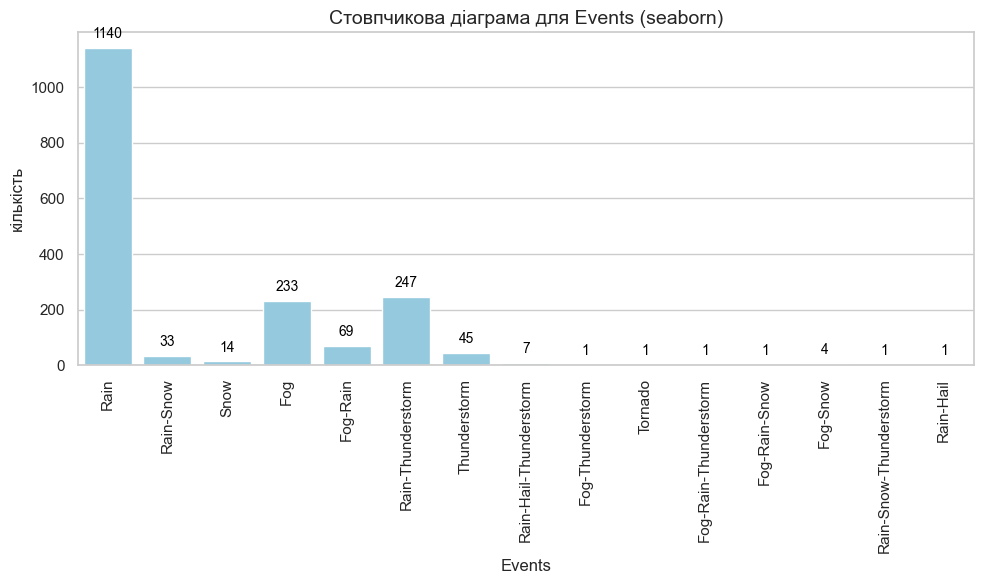

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Events', data=weather_df, color='skyblue')

ax.set_xlabel('Events', fontsize=12)
ax.set_ylabel('кількість', fontsize=12)
ax.set_title('Стовпчикова діаграма для Events (seaborn)', fontsize=14)
plt.xticks(rotation=90)

for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(f'{int(height)}',
                xy=(patch.get_x() + patch.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10,
                color='black')

plt.tight_layout()
plt.show()

---

## 9. Побудувати кругову діаграму напрямків вітру 
(сектор на діаграмі має відповідати одному з восьми напрямків – північний, південний, східний, західний та проміжні).

---

In [17]:
def degree_to_direction(degr):
    direction = ['ПН', 'ПН-СХ', 'СХ', 'ПД-СХ', 'ПД', 'ПД-ЗХ', 'ЗХ', 'ПН-ЗХ']
    index = int(((degr + 22.5) % 360) // 45)
    return direction[index]

weather_df['WindDir'] = weather_df['WindDirDegrees'].apply(degree_to_direction)
weather_df[['WindDirDegrees', 'WindDir']].head(7)

,WindDirDegrees,WindDir
0,229,ПД-ЗХ
1,143,ПД-СХ
2,256,ЗХ
3,284,ЗХ
4,2,ПН
5,64,ПН-СХ
6,43,ПН-СХ


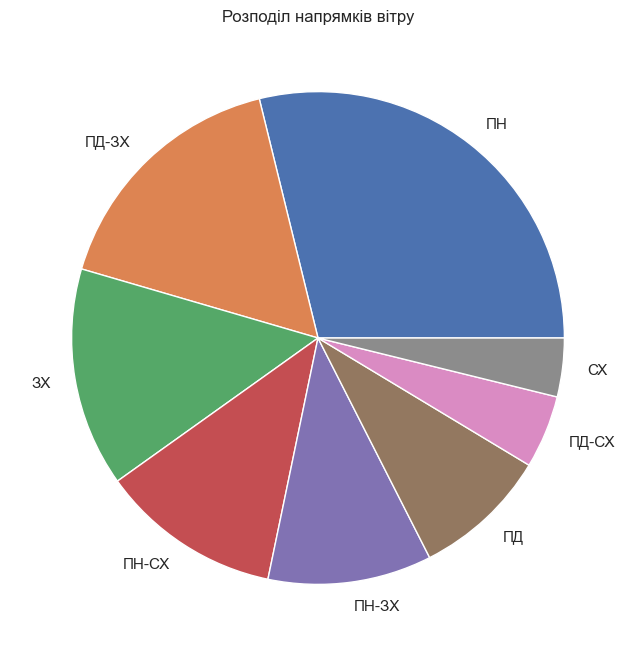

In [18]:
direction_counts = weather_df['WindDir'].value_counts()
direction_counts

plt.figure(figsize=(8,8))
plt.pie(direction_counts.values,
        labels=direction_counts.index,
       )
plt.title('Розподіл напрямків вітру')
plt.show()

---
## 10. Побудувати на одному графіку (тип графіка обрати самостійно!):
- **a.** Середню по кожному місяцю кожного року максимальну температуру;
- **b.** Середню по кожному місяцю кожного року мінімальну точку роси.
---

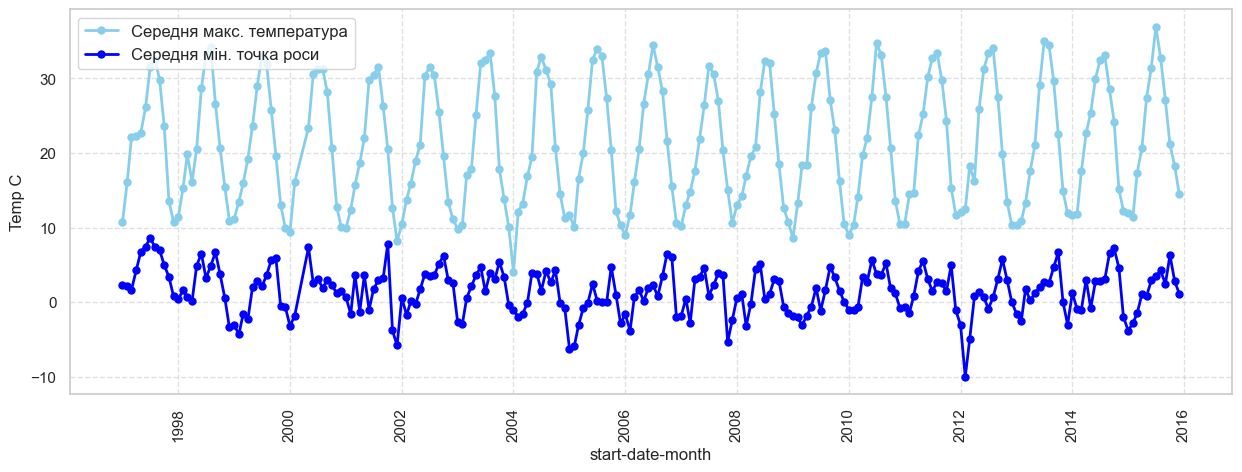

In [54]:
avr_t_dp = weather_df.groupby(['year', 'month']).agg(
    avr_max_t=('Max TemperatureC', 'mean'),
    avr_min_dp=('Min DewpointC', 'mean')
).reset_index()
avr_t_dp['start_month'] = pd.to_datetime(avr_t_dp[['year', 'month']].assign(day=1))   

plt.figure(figsize=(15, 5))
plt.plot(avr_t_dp['start_month'], avr_t_dp['avr_max_t'], color='skyblue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Середня макс. температура')
plt.plot(avr_t_dp['start_month'], avr_t_dp['avr_min_dp'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Середня мін. точка роси')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper left')
plt.xlabel('start-date-month')
plt.ylabel('Temp C')
plt.show()

## Висновок
У цій лабораторній роботі я працював із даними про погоду, використовуючи Pandas для аналізу та Matplotlib для побудови графіків. Завантажив і переглянув дані, визначив кількість записів, перевірив відсутні значення та розбив дату на окремі частини. Також знайшов дні з найнижчою вологістю, підрахував кількість туманних днів і побудував кілька графіків, зокрема для температури та погодних явищ. Робота допомогла краще зрозуміти, як працювати з даними та представляти їх у зручному вигляді.